$
    \newcommand{\RR}{\mathbf{R}}
    \newcommand{\dv}[3][]{\frac{d^{#1} #2}{d {#3}^{#1}}}
    \newcommand{\dwrt}[2][]{\frac{d^{#1}}{d {#2}^{#1}}}
    \newcommand{\pdv}[3][]{\frac{\partial^{#1} #2}{\partial {#3}^{#1}}}
    \newcommand{\pdwrt}[2][]{\frac{\partial^{#1}}{\partial {#2}^{#1}}}
    \newcommand{\dd}[2][]{\, d^{#1}#2}
    \newcommand{\qty}[1]{\left[#1 \right]}
    \renewcommand{\exp}[1]{e^{#1}}
    \newcommand{\qq}[1]{\qquad \text{#1}\qquad}
    \newcommand{\leadsto}{\quad & \implies \quad}
$

# MATH 310-10: Homework 3
- Submitted 10/2/17 by Colton Grainger for MATH 310-10: Ordinary Differential Equations, Engineering Outreach
- **Text:** *Differential Equations and Boundary Value Problems: Computing and Modeling* by C. Henry Edwards, David E. Penney and David Calvis, 5th Edition, Prentice Hall

## &sect; 2.4
### Euler Method

I define an Euler (constant slope) method with a while loop. `euler` requires the arguments 
- `f`, a function of two real numbers,
- `x0` and `y0`, the initial values,
- `h`, the step size, and
- `xmax`, the $x$ value at which to stop

and returns a list of ordered pairs.

In [1]:
def euler (f, x0, y0, h, xmax):
    x, y = x0, y0
    xd, yd = [x0], [y0]
    while x < xmax:
        y = y + h*f(y, x)
        yd.append(y)
        x = x + h
        xd.append(x)
    return(zip(xd,yd))

### Prob 1

We approximate a solution to the IVP $y' = -y,y(0)=2$ on the interval $[0,\frac12]$. 

In [2]:
def f(y, x):
    return -y

1. First with step size `h = 0.25`.
2. Then with step size `h = 0.1`.
3. Lastly we compare values to the analytic solution $y = 2e^{-x}$.

In [3]:
euler(f, 0, 2, 0.25, 0.5)

[(0, 2),
 (0.250000000000000, 1.50000000000000),
 (0.500000000000000, 1.12500000000000)]

In [4]:
euler(f, 0, 2, 0.1, 0.5)

[(0, 2),
 (0.100000000000000, 1.80000000000000),
 (0.200000000000000, 1.62000000000000),
 (0.300000000000000, 1.45800000000000),
 (0.400000000000000, 1.31220000000000),
 (0.500000000000000, 1.18098000000000)]

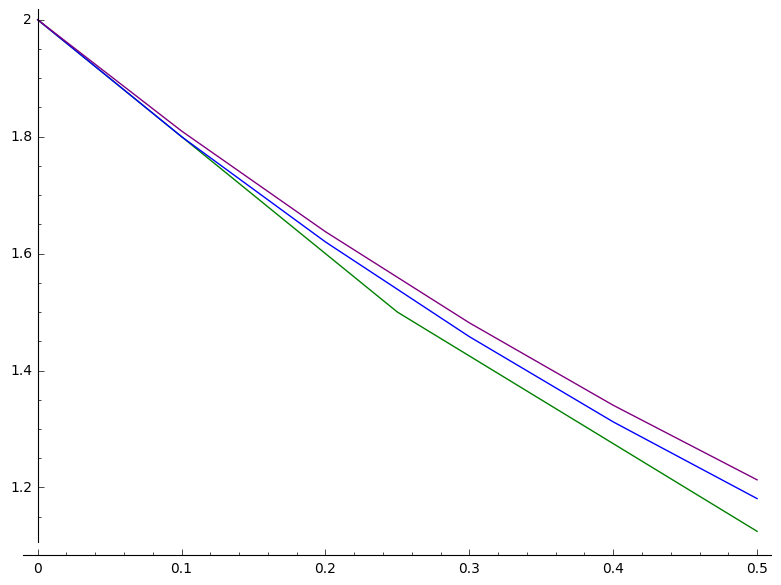

In [5]:
sum([
    list_plot(
        euler(f, 0, 2, 0.25, 0.5),
        plotjoined = True,
        color = 'green'),
    list_plot(
        euler(f, 0, 2, 0.1, 0.5), 
        plotjoined = True,
        color = 'blue'),       
    list_plot(
        [(x,2*exp(-x)) for x in [0, 0.1,.. ,0.5]],
        plotjoined = True,
        color = 'purple')  
])

Here's the global error for step size `h = 0.25`.

In [6]:
euler(f, 0, 2, 0.25, 0.5)[2][1]-2*exp(-0.5)

-0.0880613194252668

Here's the global error for step size `h = 0.1`.

In [7]:
euler(f, 0, 2, 0.1, 0.5)[5][1]-2*exp(-0.5)

-0.0320813194252667

### Prob 5

We approximate a solution to the IVP $y' = y-x-1,y(0)=1$ on the interval $[0,\frac12]$. 

In [8]:
def f(y, x):
    return y-x-1

1. First with step size `h = 0.25`.
2. Then with step size `h = 0.1`.
3. Lastly we compare values to the analytic solution $y = 2 + x - \exp{x}$.

In [9]:
euler(f, 0, 1, 0.25, 0.5)

[(0, 1),
 (0.250000000000000, 1.00000000000000),
 (0.500000000000000, 0.937500000000000)]

In [10]:
euler(f, 0, 1, 0.1, 0.5)

[(0, 1),
 (0.100000000000000, 1.00000000000000),
 (0.200000000000000, 0.990000000000000),
 (0.300000000000000, 0.969000000000000),
 (0.400000000000000, 0.935900000000000),
 (0.500000000000000, 0.889490000000000)]

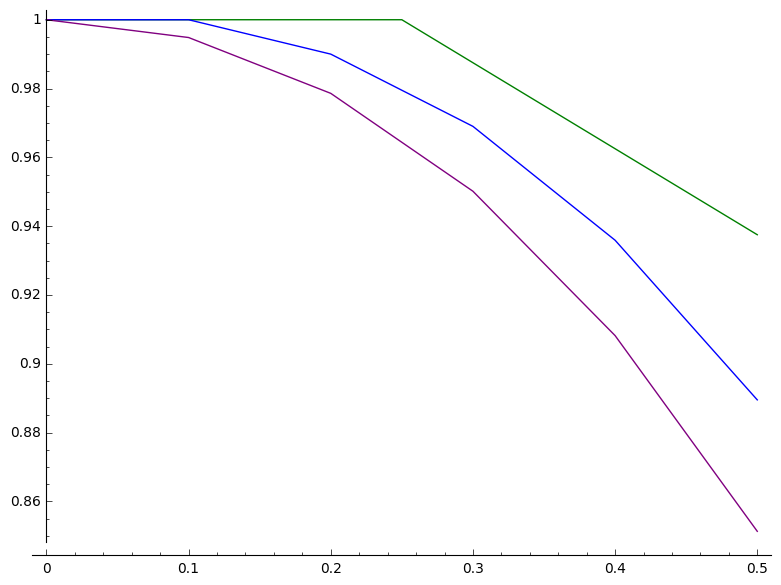

In [11]:
sum([
    list_plot(
        euler(f, 0, 1, 0.25, 0.5),
        plotjoined = True,
        color = 'green'),
    list_plot(
        euler(f, 0, 1, 0.1, 0.5), 
        plotjoined = True,
        color = 'blue'),       
    list_plot(
        [(x,2+x-exp(x)) for x in [0, 0.1,.. ,0.5]],
        plotjoined = True,
        color = 'purple')  
])

Here's the global error for step size `h = 0.25`.

In [12]:
euler(f, 0, 1, 0.25, 0.5)[2][1]-(2+x-exp(0.5))

0.0862212707001282

Here's the global error for step size `h = 0.1`.

In [13]:
euler(f, 0, 1, 0.1, 0.5)[5][1]-(2+x-exp(0.5))

0.0382112707001281

Notice, when we scaled our step size by a factor of $2/5$, the error scaled proportionally. For the `euler` method, the global error is $\mathcal{O}(h)$. 

In [14]:
0.0862212707001282*(2/5)

0.0344885082800513

## &sect; 2.5
### Improved Euler Method

I define an improved Euler method. `impeuler` requires the same arguments as `euler` and similarly returns a list of ordered pairs.

In [15]:
def impeuler (f, x0, y0, h, xmax):
    x = x0
    u, y = y0, y0
    xd, yd = [x0], [y0]
    while x < xmax:
        u = y + h*f(y, x)
        y = y + (h/2)*(f(y, x) + f(u, x + h))
        yd.append(y)
        x = x + h
        xd.append(x)
    return(zip(xd,yd))

### Prob 1

Consider IVP $y' = -y, y(0) = 2$ on the interval $[0,\frac12]$. 

In [16]:
def f(y, x):
    return -y

Let's approximate with the **improved Euler method**.
1. First with step size `h = 0.25`.
2. Then with step size `h = 0.1`.
3. Lastly we compare values to the analytic solution $y = 2e^{-x}$.

In [17]:
impeuler(f, 0, 2, 0.25, 0.5)

[(0, 2),
 (0.250000000000000, 1.56250000000000),
 (0.500000000000000, 1.22070312500000)]

In [18]:
impeuler(f, 0, 2, 0.1, 0.5)

[(0, 2),
 (0.100000000000000, 1.81000000000000),
 (0.200000000000000, 1.63805000000000),
 (0.300000000000000, 1.48243525000000),
 (0.400000000000000, 1.34160390125000),
 (0.500000000000000, 1.21415153063125)]

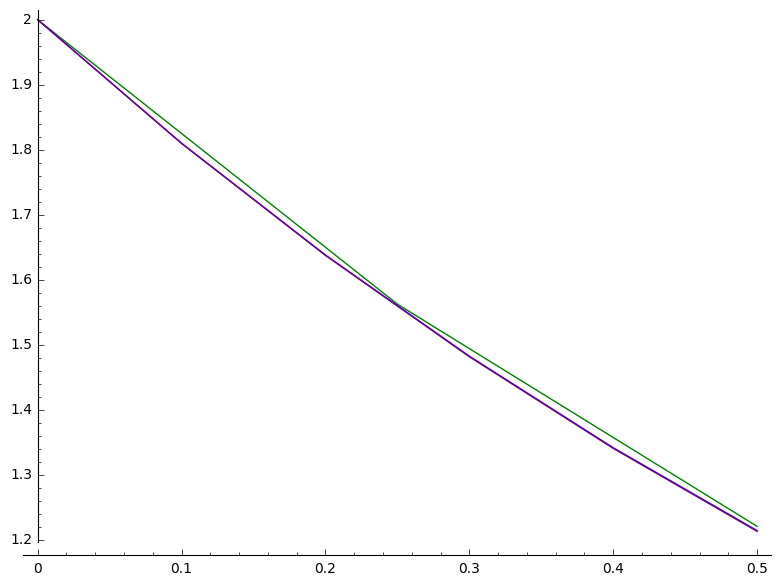

In [19]:
sum([
    list_plot(
        impeuler(f, 0, 2, 0.25, 0.5),
        plotjoined = True,
        color = 'green'),
    list_plot(
        impeuler(f, 0, 2, 0.1, 0.5), 
        plotjoined = True,
        color = 'blue'),       
    list_plot(
        [(x,2*exp(-x)) for x in [0, 0.1,.. ,0.5]],
        plotjoined = True,
        color = 'purple')  
])

Here's the global error for step size `h = 0.25`.

In [20]:
impeuler(f, 0, 2, 0.25, 0.5)[2][1]-2*exp(-0.5)

0.00764180557473315

Here's the global error for step size `h = 0.1`.

In [21]:
impeuler(f, 0, 2, 0.1, 0.5)[5][1]-2*exp(-0.5)

0.00109021120598318

Notice, when we scaled our step size by a factor of $2/5$, the error was scaled proportional to $(2/5)^2$. For the `impeuler` method, the global error is $\mathcal{O}(h^2)$. 

In [22]:
0.00764180557473315*(2/5)^2

0.00122268889195730

### Prob 5

Consider the IVP $y' = y-x-1,y(0)=1$ on the interval $[0,\frac12]$. 

In [23]:
def f(y, x):
    return y-x-1

Let's approximate with the **improved Euler method**.
1. First with step size `h = 0.25`.
2. Then with step size `h = 0.1`.
3. Lastly we compare values to the analytic solution $y = 2e^{-x}$.

In [24]:
impeuler(f, 0, 1, 0.25, 0.5)

[(0, 1),
 (0.250000000000000, 0.968750000000000),
 (0.500000000000000, 0.858398437500000)]

In [25]:
impeuler(f, 0, 1, 0.1, 0.5)

[(0, 1),
 (0.100000000000000, 0.995000000000000),
 (0.200000000000000, 0.978975000000000),
 (0.300000000000000, 0.950767375000000),
 (0.400000000000000, 0.909097949375000),
 (0.500000000000000, 0.852553234059375)]

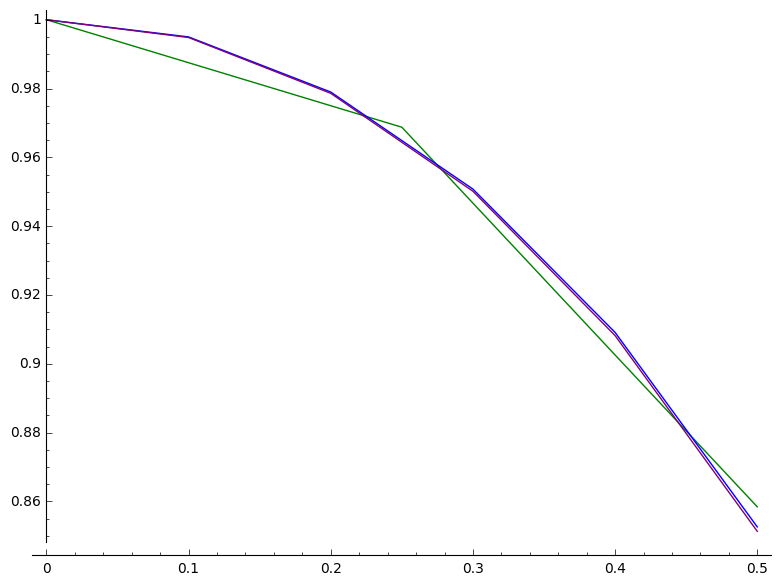

In [26]:
sum([
    list_plot(
        impeuler(f, 0, 1, 0.25, 0.5),
        plotjoined = True,
        color = 'green'),
    list_plot(
        impeuler(f, 0, 1, 0.1, 0.5), 
        plotjoined = True,
        color = 'blue'),       
    list_plot(
        [(x,2+x-exp(x)) for x in [0, 0.1,.. ,0.5]],
        plotjoined = True,
        color = 'purple')  
])

Here's the global error for step size `h = 0.25`.

In [27]:
impeuler(f, 0, 1, 0.25, 0.5)[2][1]-(2+x-exp(0.5))

0.00711970820012819

Here's the global error for step size `h = 0.1`.

In [28]:
impeuler(f, 0, 1, 0.1, 0.5)[5][1]-(2+x-exp(0.5))

0.00127450475950330

Again, notice the error scales as expected for an $\mathcal{O}(h^2)$ method.

In [29]:
0.00711970820012819*(2/5)^2

0.00113915331202051

## &sect; 2.6
### Runge-Kutta 4th order Method

I implement the Runge-Kutta 4th order method.

In [30]:
def rk4 (f, x0, y0, h, xmax):
    x = x0
    y = y0
    xd, yd = [x0], [y0]
    while x < xmax:
        #u1 = y
        m1 = f(y, x)
        
        u2 = y + (h/2)*m1
        m2 = f(u2, x + h/2)
        
        u3 = y + (h/2)*m2
        m3 = f(u3, x + h/2)
        
        u4 = y + h*m3
        m4 = f(u4, x + h)

        y = y + (h/6)*(m1 + 2*m2 + 2*m3 + m4)
        yd.append(y)
        x = x + h
        xd.append(x)
    return(zip(xd,yd))

### Prob 1

Consider the IVP $y' = -y, y(0) = 2$ on the interval $[0,\frac12]$. 

In [31]:
def f(y, x):
    return -y

Let's approximate with the **Runge-Kutta 4th order method**.
1. First with step size `h = 0.25`.
2. Then with step size `h = 0.1`.
3. Lastly we compare values to the analytic solution $y = 2e^{-x}$.

In [32]:
rk4(f, 0, 2, 0.25, 0.5)

[(0, 2),
 (0.250000000000000, 1.55761718750000),
 (0.500000000000000, 1.21308565139771)]

In [33]:
rk4(f, 0, 2, 0.1, 0.5)

[(0, 2),
 (0.100000000000000, 1.80967500000000),
 (0.200000000000000, 1.63746180281250),
 (0.300000000000000, 1.48163684400236),
 (0.400000000000000, 1.34064057783498),
 (0.500000000000000, 1.21306186884676)]

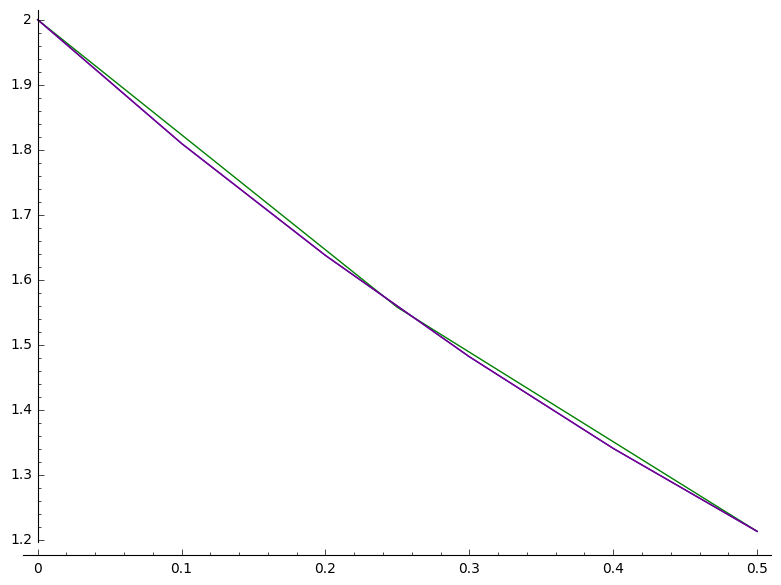

In [34]:
sum([
    list_plot(
        rk4(f, 0, 2, 0.25, 0.5),
        plotjoined = True,
        color = 'green'),
    list_plot(
        rk4(f, 0, 2, 0.1, 0.5), 
        plotjoined = True,
        color = 'blue'),       
    list_plot(
        [(x,2*exp(-x)) for x in [0, 0.1,.. ,0.5]],
        plotjoined = True,
        color = 'purple')  
])

Here's the global error for step size `h = 0.25`.

In [35]:
rk4(f, 0, 2, 0.25, 0.5)[2][1]-2*exp(-0.5)

0.0000243319724382296

Here's the global error for step size `h = 0.1`.

In [36]:
rk4(f, 0, 2, 0.1, 0.5)[5][1]-2*exp(-0.5)

5.49421492967994e-7

I can perform a "check-sum" of sorts on my implementation by verifying the error scales proportional to $h^4$ (*this has already caught two errors!*).

In [37]:
0.0000243319724382296*(2/5)^4

6.22898494418678e-7

**Aside.** I had found the 4th slope, `m4`, by following the line with slope `(m2+m3)/2` rather than following the line with slope `m3`. This typo was not visibly noticable, but the error *did not scale according to* $\mathcal{O}(h^4)$.

For the `rk4` method, the global error is $\mathcal{O}(h^4)$. 

### Prob 5

We approximate a solution to the IVP $y' = y-x-1,y(0)=1$ on the interval $[0,\frac12]$. 

In [38]:
def f(y, x):
    return y-x-1

Let's approximate with the **Runge-Kutta 4th order method**.
1. First with step size `h = 0.25`.
2. Then with step size `h = 0.1`.
3. Lastly we compare values to the analytic solution $y = 2 + x - \exp{x}$.

In [39]:
rk4(f, 0, 1, 0.25, 0.5)

[(0, 1),
 (0.250000000000000, 0.965983072916667),
 (0.500000000000000, 0.851300530963474)]

In [40]:
rk4(f, 0, 1, 0.1, 0.5)

[(0, 1),
 (0.100000000000000, 0.994829166666667),
 (0.200000000000000, 0.978597429149306),
 (0.300000000000000, 0.950141502937462),
 (0.400000000000000, 0.908175759919314),
 (0.500000000000000, 0.851279361403162)]

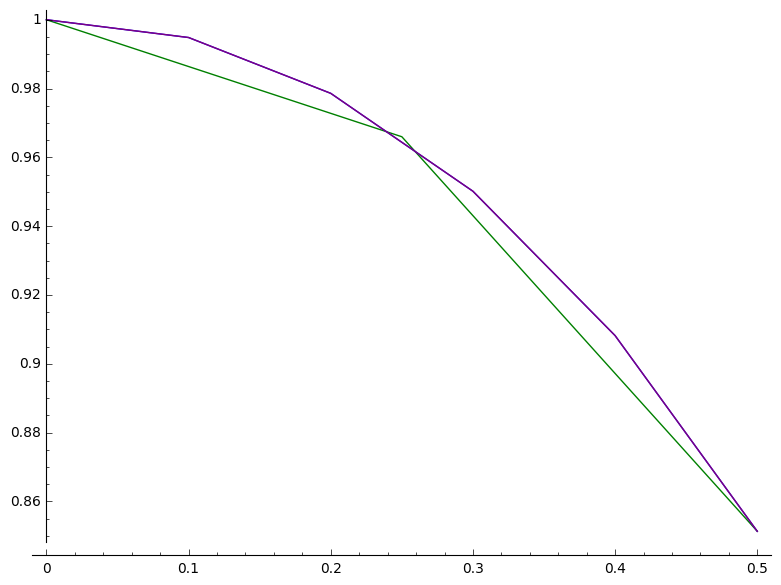

In [41]:
sum([
    list_plot(
        rk4(f, 0, 1, 0.25, 0.5),
        plotjoined = True,
        color = 'green'),
    list_plot(
        rk4(f, 0, 1, 0.1, 0.5), 
        plotjoined = True,
        color = 'blue'),       
    list_plot(
        [(x,2+x-exp(x)) for x in [0, 0.1,.. ,0.5]],
        plotjoined = True,
        color = 'purple')  
])

Here's the global error for step size `h = 0.25`.

In [42]:
rk4(f, 0, 1, 0.25, 0.5)[2][1]-(2+x-exp(0.5))

0.0000218016636019946

Here's the global error for step size `h = 0.1`.

In [43]:
rk4(f, 0, 1, 0.1, 0.5)[5][1]-(2+x-exp(0.5))

6.32103290154618e-7

Again, notice the error scales as expected for an $\mathcal{O}(h^4)$ method.

In [44]:
0.0000218016636019946*(2/5)^4

5.58122588211062e-7